## DATA ANALYSIS OF AIRBnB DATA FOR UNITED KINGDOM

Instructions:
13. Data Source: Go to http://insideairbnb.com/get-the-data.html and search London, UK to get the data for 06 September, 2023. #####Important considerations:##### ( Step 1) You are required to ask 10 questions from the dataset and answer them. (Step 2) Make sure 6-7 out of these 10 questions are quantifiable i.e there should be a definite numerical output of that question. Other 3-4 questions could be non-quantifiable questions (For eg: Answering how the price and reviews vary with respect to the type of accommodation, is a non quantifiable question.) (Step 3) Divide your code for each question into 2 parts: (Step 3.1) The first part does any pre-processing that is required for that question. You are required to put all the pre-processing like data cleaning etc. in 1 block of code. The output of this block should be a clean dataset on which the final analysis would be done. (Step 3.2) The second part of the code would use the cleaned data from step (a) and run the core analysis code. Put all the required analysis in 1 block of code. (Step 4) Your analysis will be graded based on (Step 4.1) Business value of the finding (Step 4.2) How non-obvious the questions and the insights are.(Step 4.3) Correctness of the questions and answers. (Step 4.4) Intermediate steps to demonstrate your thought process from questions to answers. (Step 6) Both positive as well as negative results are interesting to us if you can justify your hypothesis and insights. (Step 6) You are required to submit the solution as an ipython notebook to ivana.kruhoberec@turing.com.

PRELIMINARY STEP:

---



---



---



INSTALL PACKAGES

In [ ]:
# !pip install -q requests
# !pip install -q geopandas
# !pip install -q geoplot
# !pip install -q geodataset
# !pip install -q geojson
# !pip install -q emoji==0.6.0

^C


IMPORT PACKAGES

In [1]:
import re
import requests
import geopandas
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

GET THE DATASETS

In [ ]:
# Loop through each url to download the file
url1 = "http://data.insideairbnb.com/united-kingdom/england/london/2023-09-06/data/listings.csv.gz"
url2 = "http://data.insideairbnb.com/united-kingdom/england/london/2023-09-06/data/calendar.csv.gz"
url3 = "http://data.insideairbnb.com/united-kingdom/england/london/2023-09-06/data/reviews.csv.gz"
urls = [url1, url2, url3]

for url in urls:
  filename = url.split("/")[-1]
  with open(filename, "wb") as f:
      r = requests.get(url)
      f.write(r.content)

In [4]:
# Extract the datasets from zip folder
raw_listings = pd.read_csv('/content/listings.csv.gz', compression='gzip', header=0, sep=',', quotechar='"', error_bad_lines=False)
raw_calendar = pd.read_csv('/content/calendar.csv.gz', compression='gzip', header=0, sep=',', quotechar='"', error_bad_lines=False)
raw_reviews = pd.read_csv('/content/reviews.csv.gz', compression='gzip', header=0, sep=',', quotechar='"', error_bad_lines=False)

STEP 1: DATA EXPLORATION

---



---



---



SUMMARY STATISTICS/ DATA EXPLORATION

In [5]:
raw_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,8.794600e+04,8.794600e+04,8.794600e+04,87941.000000,87941.000000,0.0,87946.000000,87946.000000,87946.000000,0.0,...,64865.000000,64821.000000,64851.000000,64821.000000,64820.000000,87946.000000,87946.000000,87946.000000,87946.000000,65788.000000
mean,3.586523e+17,2.023091e+13,1.589904e+08,48.666629,85.809804,NaN,51.509557,-0.127900,3.165386,NaN,...,4.623333,4.777310,4.798890,4.720487,4.593404,18.140950,13.852284,4.133548,0.029154,1.014903
std,4.121119e+17,0.000000e+00,1.694033e+08,293.465172,523.634388,NaN,0.048749,0.099645,1.980390,NaN,...,0.551075,0.457757,0.451838,0.421893,0.536391,63.745275,46.876541,24.742723,0.490367,1.365452
min,1.391300e+04,2.023091e+13,4.775000e+03,1.000000,1.000000,NaN,51.295937,-0.497800,1.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.215818e+07,2.023091e+13,2.186737e+07,1.000000,1.000000,NaN,51.483371,-0.189174,2.000000,NaN,...,4.500000,4.750000,4.790000,4.630000,4.490000,1.000000,0.000000,0.000000,0.000000,0.150000
50%,4.935854e+07,2.023091e+13,8.140696e+07,2.000000,3.000000,NaN,51.513780,-0.126400,2.000000,NaN,...,4.800000,4.940000,4.970000,4.840000,4.740000,2.000000,1.000000,0.000000,0.000000,0.540000
75%,8.164776e+17,2.023091e+13,2.668211e+08,7.000000,10.000000,NaN,51.539420,-0.068066,4.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,4.960000,6.000000,3.000000,1.000000,0.000000,1.320000
max,9.738958e+17,2.023091e+13,5.355140e+08,3023.000000,5272.000000,NaN,51.681642,0.295731,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,595.000000,312.000000,285.000000,18.000000,50.250000


In [6]:
raw_listings.shape

(87946, 75)

In [7]:
len(raw_listings.id)

87946

In [8]:
raw_listings.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,92644,https://www.airbnb.com/rooms/92644,20230906022807,2023-09-06,city scrape,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,<b>The space</b><br />Hi everyone! I have 2 ro...,NaN,https://a0.muscache.com/pictures/715127/85bdb4...,498201,...,4.67,4.53,4.68,NaN,t,1,0,1,0,1.45
1,93015,https://www.airbnb.com/rooms/93015,20230906022807,2023-09-06,city scrape,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,Gorgeous 2 bed ground floor apartment with per...,A bit of history about the W14 area: <br />Com...,https://a0.muscache.com/pictures/865937ec-ee56...,499704,...,4.88,4.85,4.74,NaN,f,1,1,0,0,0.27


In [9]:
raw_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [10]:
raw_listings['bedrooms'].notnull().sum()

55172

Non missing values is almost half of the available data

In [11]:
raw_listings['bedrooms'].isnull().sum()

32774

check percentage missing values in each column

In [12]:
print("Bedrroms: ", (raw_listings['bedrooms'].isnull().sum()/raw_listings['bedrooms'].notnull().sum())*100,'%')
print("Host IDs: ", (raw_listings['host_id'].isnull().sum()/raw_listings['host_id'].notnull().sum())*100,'%')
print("Price: ", (raw_listings['price'].isnull().sum()/raw_listings['price'].notnull().sum())*100,'%')
print("Room Types: ", (raw_listings['room_type'].isnull().sum()/raw_listings['room_type'].notnull().sum())*100,'%')
print("Neighborhood: ", (raw_listings['neighbourhood_cleansed'].isnull().sum()/raw_listings['neighbourhood_cleansed'].notnull().sum())*100,'%')
print("Beds: ", (raw_listings['beds'].isnull().sum()/raw_listings['beds'].notnull().sum())*100,'%')
print("No. of Reviews: ", (raw_listings['number_of_reviews'].isnull().sum()/raw_listings['number_of_reviews'].notnull().sum())*100,'%')

Bedrroms:  59.40332052490393 %
Host IDs:  0.0 %
Price:  0.0 %
Room Types:  0.0 %
Neighborhood:  0.0 %
Beds:  1.3062710224392942 %
No. of Reviews:  0.0 %


Too many null values for number of bedrooms

Room types:  ['Private room' 'Entire home/apt' 'Hotel room' 'Shared room']
Entire home/apt    54575
Private room       32711
Shared room          441
Hotel room           219
Name: room_type, dtype: int64


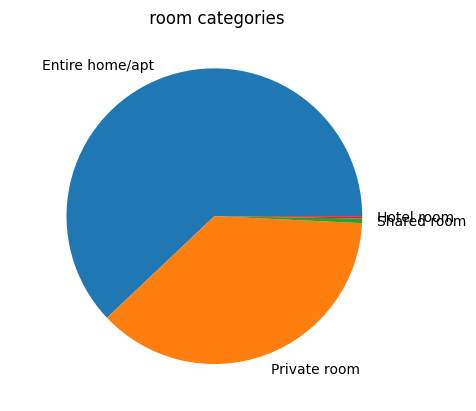

In [13]:
# check room types
print("Room types: ",raw_listings['room_type'].unique())
# Count each category
room_categories = raw_listings['room_type'].value_counts()
print(room_categories)
room_categories.plot.pie(label=" ", title=" room categories");
plt.show(block=True);

we have more entire home/apartments and private rooms compared to shared rooms and hotels

In [14]:
raw_listings.neighbourhood_cleansed

0                    Wandsworth
1        Hammersmith and Fulham
2                     Islington
3        Kensington and Chelsea
4                     Greenwich
                  ...          
87941               Westminster
87942                 Southwark
87943                    Merton
87944                  Hounslow
87945            City of London
Name: neighbourhood_cleansed, Length: 87946, dtype: object

In [15]:
raw_listings.host_id

0           498201
1           499704
2            54730
3            60302
4           497514
           ...    
87941    498408783
87942     36645347
87943    340514057
87944    439074505
87945    475112423
Name: host_id, Length: 87946, dtype: int64

In [16]:
raw_calendar.head(2)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,13913,2023-09-06,f,$79.00,$79.00,1.0,29.0
1,13913,2023-09-07,f,$79.00,$79.00,1.0,29.0


STEP 2: DATA PREPROCESSING

---



---



---



Data Aggregation

It appears most of the data we need are in order. however, we need to make our host id a string to keep it from being used for numeric calculations. Notice that the id column holds unique value for every entry. This is very important because when I will show you the number of listings some individuals ids hold you may be shocked.

In [1]:
# Reduce dimensionality of our dataset
df_map = raw_listings[['neighbourhood_cleansed','id','host_id','room_type','price', 'bedrooms','beds','number_of_reviews','review_scores_rating','calculated_host_listings_count_entire_homes','latitude', 'longitude', ]]

NameError: name 'raw_listings' is not defined

In [18]:
# convert host id to string
df_map['host_id'] = df_map['host_id'].astype('str')
# remove leading and trailing espaces
df_map['host_id'] = df_map['host_id'].str.strip()

In [19]:
print(type(df_map['host_id'][0])) #inspect

# confirm that our data has not changes
df_map['id'].nunique(), len(df_map['id'])

<class 'str'>


(87946, 87946)

In [20]:
# remove $ and ',' from our price column and convert it to a float type
df_map['price'] = df_map['price'].str.replace(',','').str.replace('$','').astype(float)

We need to know how many listings are controlled by each host id. so we would count each host id and attach its value to each host id's record.
we also need to attach average price for each host_id to each record.

In [21]:
# count number of host ids and attach each host id's count to its record
df_map['host_id_count'] = df_map.groupby('host_id')['host_id'].transform('count')
# sort our table by host ids count
df_map.sort_values(by = 'host_id_count', ascending=False, inplace=True)
# attach average price for each host_id
df_map['avg_price'] = df_map.groupby(['neighbourhood_cleansed','host_id'])['price'].transform('mean')
df_map.head()

,neighbourhood_cleansed,id,host_id,room_type,price,bedrooms,beds,number_of_reviews,review_scores_rating,calculated_host_listings_count_entire_homes,latitude,longitude,host_id_count,avg_price
54699,Brent,659304585594704309,129230780,Private room,1570.0,1.0,1.0,0,NaN,310,51.560770,-0.279960,595,1570.000000
43663,Southwark,48991317,129230780,Private room,1570.0,1.0,1.0,1,4.0,310,51.501530,-0.101040,595,1617.105263
66791,Westminster,821584842311449797,129230780,Entire home/apt,1000.0,1.0,1.0,0,NaN,310,51.522401,-0.173234,595,1061.606335
66550,Westminster,821485577904742339,129230780,Entire home/apt,1000.0,1.0,1.0,0,NaN,310,51.520950,-0.172460,595,1061.606335
66551,Westminster,821527287577472329,129230780,Entire home/apt,1000.0,1.0,1.0,0,NaN,310,51.522050,-0.172950,595,1061.606335


INITIAL PRELIMINARY ANALYSIS

Notice that there some host ids with so much holdings (listings) up to 500 and above. while some have just 1.

In [22]:
print('Max Price:',df_map['price'].max(), ' Min price:', df_map['price'].min())
print('Max Avg Price:',df_map['avg_price'].max(), ' Min Avg price:', df_map['avg_price'].min())
print('Max Host ID Count:',df_map['host_id_count'].max(), ' Min Host ID Count:', df_map['host_id_count'].min())

Max Price: 80100.0  Min price: 0.0
Max Avg Price: 80100.0  Min Avg price: 0.25
Max Host ID Count: 595  Min Host ID Count: 1


I would like to have a macro view of the dataset on a map but I perceive there may be a challenge because of the range of prices and number of listings for each id. So I will take a natural log of the host ID count.

In [23]:
# Natural log of host id counts
df_map['nlog_host_id_count'] = np.log(df_map['host_id_count'])

In [24]:
df_map['nlog_host_id_count'].min(), df_map['nlog_host_id_count'].max()

(0.0, 6.38856140554563)

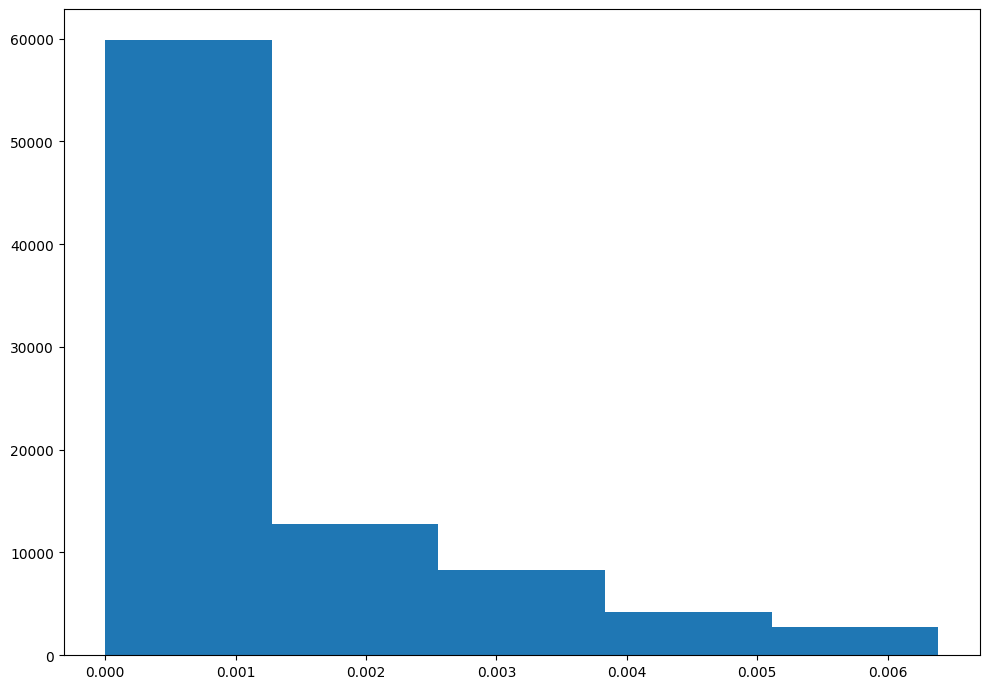

In [25]:
x = df_map['nlog_host_id_count']/1000

n_bins = 5
fig, axs = plt.subplots(1,1, figsize=(10,7), tight_layout= True)

axs.hist(x, bins=n_bins)
plt.show()

The Distribution listings per Host IDs is a bit better than if we had not taking the natural log

In [26]:
df_map.head(2)

,neighbourhood_cleansed,id,host_id,room_type,price,bedrooms,beds,number_of_reviews,review_scores_rating,calculated_host_listings_count_entire_homes,latitude,longitude,host_id_count,avg_price,nlog_host_id_count
54699,Brent,659304585594704309,129230780,Private room,1570.0,1.0,1.0,0,NaN,310,51.56077,-0.27996,595,1570.000000,6.388561
43663,Southwark,48991317,129230780,Private room,1570.0,1.0,1.0,1,4.0,310,51.50153,-0.10104,595,1617.105263,6.388561


STEP 3: DATA ANALYSIS

---



---



---



I have to do a little bit of adjusting out geocoordinates to move some markers a bit away from each other but still keeping each withing its region to enhance our visualization on the map

In [27]:
sigma = 0.0015

# Adjust each coordinate around its region
df_map['new_latitude'] = df_map['latitude'].apply(lambda x: np.random.normal(x, sigma))
df_map['new_longitude'] = df_map['longitude'].apply(lambda x: np.random.normal(x, sigma))

# Create a geopandas file object
gdf = geopandas.GeoDataFrame(df_map, geometry=geopandas.points_from_xy(df_map.new_longitude, df_map.new_latitude))

# save a copy for referenece
gdf.to_file("output.geo.json", driver='GeoJSON')

Maps can be problematic at times. I've been trying to put whole bunch of information on hover_names but it turns out, it has got mind of its own. 😀

In [28]:
import plotly.express as px

viz_price = df_map[df_map['avg_price']>=1000]

fig = px.scatter_mapbox(viz_price, #hover_name="neighbourhood_cleansed",
    size="avg_price",
    title="Map of Average price",
    lat="new_latitude",
    lon="new_longitude",
    custom_data = ['host_id', 'host_id_count', 'price', 'avg_price', 'room_type', 'bedrooms','beds'],
    color="room_type"
    )
fig.update_traces(mode="markers",
                  #hovertemplate=None

      hovertemplate="host id: %{host_id[0]} <br>avg price: %{avg_price[1]}: <br>Room type: {room_type[2]} <br>Bed rooms: {bed_rooms[3]}"
      )
fig.update_layout(#hovermode="y unified",
                  mapbox={"style": "carto-positron", "zoom": 10}, margin={"t":0,"b":0,"l":0,"r":0})

fig.show()

Let me work around and put as much as I can on hover display.
Lets plot the average price of listings above $1000. Please, feel free to hover your mouse pointer over the bubbles on the map. It provides extra information.

In [29]:
viz_price = df_map[df_map['avg_price']>=1000]

px.scatter_mapbox(
    viz_price,

    hover_name="neighbourhood_cleansed",
    size="avg_price",
    title="Map of Average price",
    lat="new_latitude",
    lon="new_longitude",
    color="room_type"

).update_layout(mapbox={"style": "carto-positron", "zoom": 10}, margin={"t":0,"b":0,"l":0,"r":0})

Even in Camden with shared room rooms, rent is up to $8888

In [30]:
viz_price = df_map[df_map['avg_price']>=1000]

px.scatter_mapbox(
    viz_price,

    hover_name="neighbourhood_cleansed",
    size="avg_price",
    title="Map of Average price",
    lat="new_latitude",
    lon="new_longitude",
    color="bedrooms"

).update_layout(mapbox={"style": "carto-positron", "zoom": 10}, margin={"t":0,"b":0,"l":0,"r":0})

Are these rich neighborhoods or there are other factors affecting the cost here: Dagenham, Hackney, Greater London, Mayfair, london Hamstead Village, Stratford London, Wembley Park, London

other factors to consider: host_is_superhost, rating

even without running a model to check for correlation between cost of rent and number of bedrooms I can see from the visualization (map) that there is no significant correlation between number of bedrooms and cost of renting. Rather it does appear that it is more correlated with host_ids and likely the neighborhood. we observe that by a simple heatmap. I'm also tempted to say the expensive room types may be luxurious but I have no evidence to that.

<Axes: >

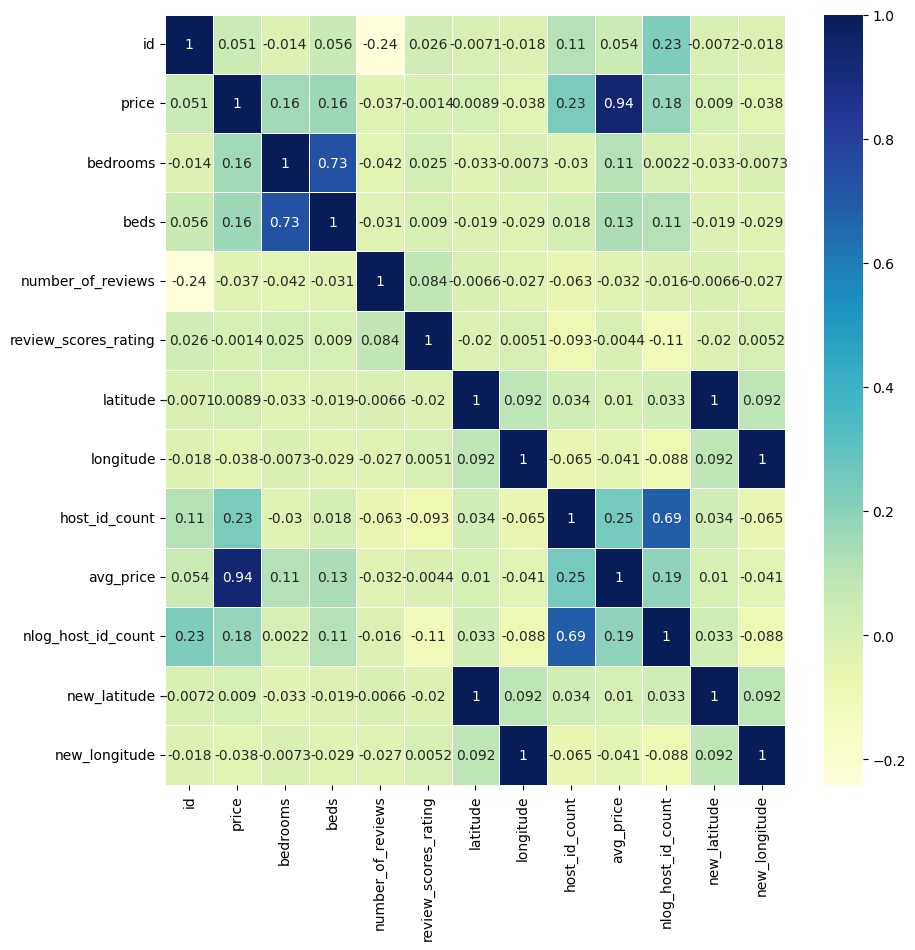

In [31]:
import seaborn as sb
corr_map = df_map.drop(columns = ['calculated_host_listings_count_entire_homes'])

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sb.heatmap(corr_map.corr(), annot=True, linewidths=.5, ax=ax, cmap="YlGnBu")

Below we can observe even IDs with highest number of listings still have its average price range between 100, and 1750 dollars.



<Axes: ylabel='neighbourhood_cleansed'>

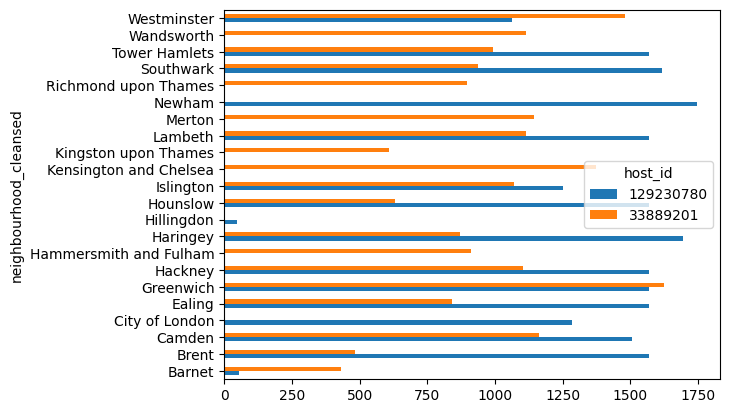

In [83]:
# '129230780', '33889201' most listings by IDs
# '289928037'  '34349317	' top prices by host IDs

ids = ['129230780', '33889201'] #  , ,,  '289928037', '34349317'
id_check = df_map[df_map['host_id'].isin(ids)]
id_check.head(2)

pivot_df = id_check.pivot_table(values='price', index='neighbourhood_cleansed', columns='host_id', aggfunc='mean') #.reset_index()
pivot_df.plot(kind="barh")

While those host IDs with top prices are more correlated with neighborhood as seen below

<Axes: ylabel='neighbourhood_cleansed'>

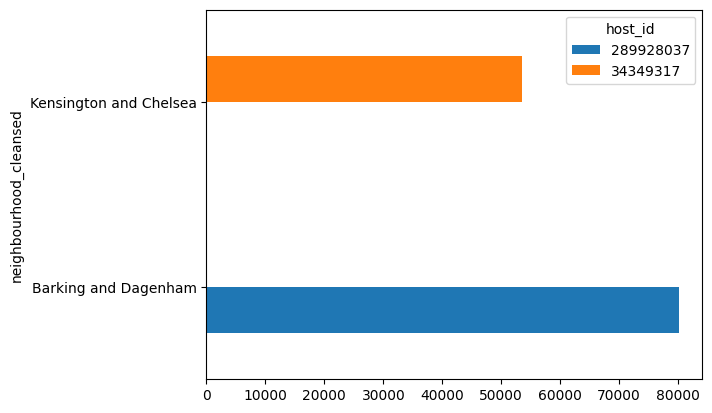

In [84]:
ids = ['289928037', '34349317'] #  , ,,  '129230780', '33889201'
id_check = df_map[df_map['host_id'].isin(ids)]
id_check.head(2)

pivot_df2 = id_check.pivot_table(values='price', index='neighbourhood_cleansed', columns='host_id', aggfunc='mean') #.reset_index()
pivot_df2.plot(kind="barh")

In [85]:
# top_host = df_map.sort_values(by='price', ascending=False)
# #top_host[top_host['host_id'] != '129230780']
# top_host

<Axes: title={'center': 'Top 20 home prices'}, ylabel='neighbourhood_cleansed'>

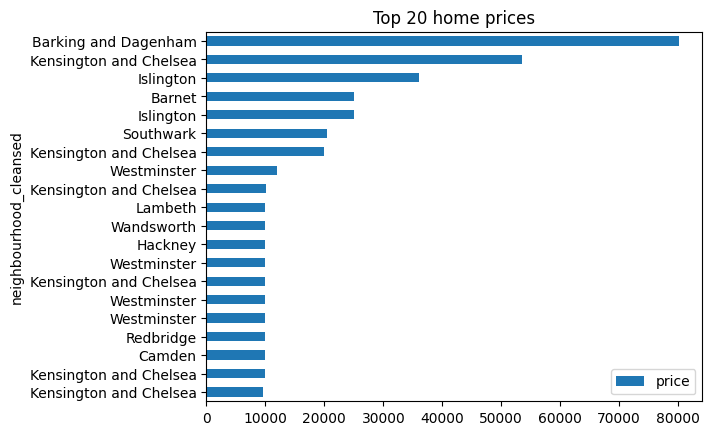

In [32]:
top_20 = df_map[['neighbourhood_cleansed','price']].sort_values(by='price').dropna().tail(20)
top_20.plot(x='neighbourhood_cleansed',
            y='price',
            kind='barh',
            title='Top 20 home prices')

Let's us look at the average price for listings less than or equal to $20

In [33]:
viz_price = df_map[df_map['avg_price']<=20]

px.scatter_mapbox(
    viz_price,

    hover_name="neighbourhood_cleansed",
    size="avg_price",
    title="Map of Average price",
    lat="new_latitude",
    lon="new_longitude",
    color="room_type"

).update_layout(mapbox={"style": "carto-positron", "zoom": 10}, margin={"t":0,"b":0,"l":0,"r":0})

Even close to London there are affordable housing. As low as average of $8 (Westminster) for an entire home/ apartment.

 The bar chart below tells us there are homes of as less as $1 in Hackney.

<Axes: title={'center': 'Bottom 20 home prices'}, ylabel='neighbourhood_cleansed'>

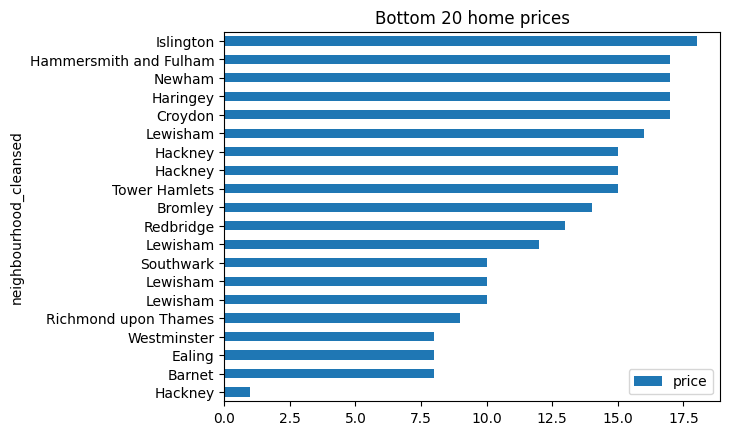

In [34]:
bottom_20 = df_map[['neighbourhood_cleansed','price','bedrooms']].sort_values(by='price').dropna().head(20) #.dropna()
bottom_20.plot(x='neighbourhood_cleansed',
            y='price',
            kind='barh',
            title='Bottom 20 home prices')

I have not seen much of hotels and how they playing in price movements. How about we select a random subset of our data to see if we can find some value especially from the middle class.

In [35]:
viz_id_count = df_map.sample(n=500, replace=False) #>=500]
# dataframe referred to in question, cities listed multiple times

px.scatter_mapbox(
    viz_id_count,
    lat="new_latitude",
    lon="new_longitude",
    hover_name="neighbourhood_cleansed",
    #custom_data=np.stack((viz_id_count["host_id"],viz_id_count["ac_neigborhood"])),
    size= "nlog_host_id_count",   #"host_id_count",
    color="room_type"
    # hovertemplate="<b>host_id</b>: %{customdata[0]}<br>" +
                    # "<b>host_id_count</b>: %{customdata[1]}"

).update_layout(mapbox={"style": "carto-positron", "zoom": 10},
                margin={"t":0,"b":0,"l":0,"r":0}
)



<Axes: title={'center': 'Bottom 20 Average price IDs'}>

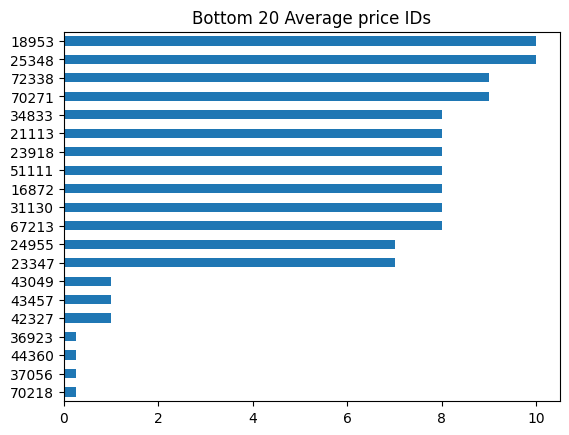

In [36]:
avg_price_by_host_id = df_map.groupby(['host_id','avg_price'])['avg_price'].transform('max').sort_values().head(20) #
avg_price_by_host_id.plot(x='host_id',
            y='price',
            kind='barh',
            title='Bottom 20 Average price IDs')

<Axes: title={'center': 'Top 20 Average price IDs'}>

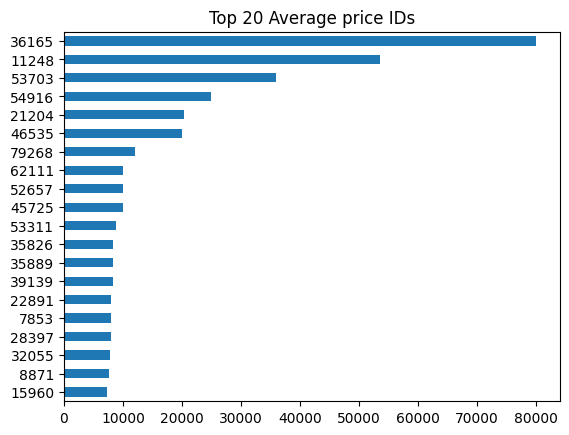

In [37]:
#
avg_price_by_host_id = df_map.groupby(['host_id','avg_price'])['avg_price'].transform('max').sort_values().tail(20) #
avg_price_by_host_id.plot(x='host_id',
            y='price',
            kind='barh',
            title='Top 20 Average price IDs')

<Axes: title={'center': 'Top 20 Average price IDs'}>

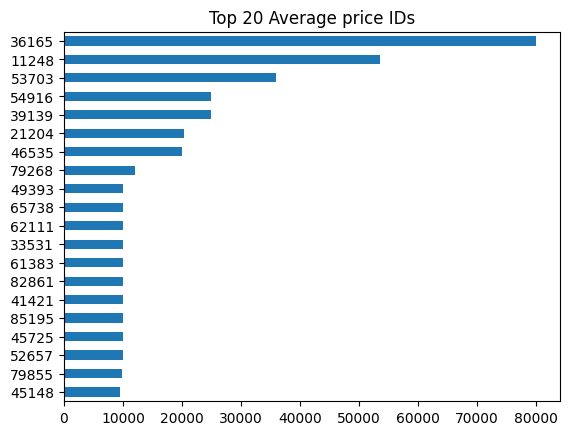

In [38]:
# Just to be sure I the above result is correcting
# notice there is a slight change when I use the mean of the price from when I use the max of the average prices above
price_by_host_id = df_map.groupby(['host_id','price'])['price'].transform('mean').sort_values().tail(20) #
price_by_host_id.plot(x='host_id',
            y='price',
            kind='barh',
            title='Top 20 Average price IDs')

The 36165 seem to be top the average maximum price listings per IDs, with average of $80,000 while 70218 the list with average maximum of about
approximately 1 dollar.

SENTIMENT ANALYSIS

We would now do a little bit of qualitative analysis by building a sentiment analysis using the Huggingface models. we would use transformer based model for classification and end to end pipline. we would use a bert based classififier trained on tweets to see how it perform on our dataset. if there more time we would retrain the model on our dataset and probably do an aspect based analysis if there is still time.

In [69]:
# import dependencies for our sentiment analysis

from transformers import pipeline
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# select a 100 random comments from our data
du = raw_reviews['comments'].sample(n=100, replace=False)
de = pd.Series.to_frame(du) # create a data frame of the selected sentiments
index_list = de.index.tolist()

# Set up the inference pipeline using a model from the huggingface 🤗 Hub
sentiment_analysis = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

# Let's run the sentiment analysis on each comment
comments = []
for i in range(len(de)):
  print(i)
  for review in de['comments']: #
    try:
      content = review
      sentiment = sentiment_analysis(content, truncation=True)
      comments.append({'comments': content, 'sentiment': sentiment[0]['label']}) # add each comment and sentiment label to our list

    except TypeError:
      pass

config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [70]:
# Load the data in a dataframe
df = pd.DataFrame(comments)
pd.set_option('display.max_colwidth', None)

# Show a comment for each sentiment
display(df[df["sentiment"] == 'POS'].head(1))
display(df[df["sentiment"] == 'NEU'].head(1))
display(df[df["sentiment"] == 'NEG'].head(1))

,comments,sentiment
0,Good experience overall,POS


,comments,sentiment
27,très bon accueil à notre arrivée. Le logement est très bien pour 4. Le 5eme couchage n'est pas très confortable. <br/>ce qui est très appréciable c'est l'arrêt de bus juste devant.<br/>bon rapport qualité prix,NEU


,comments,sentiment
5,"YOU WON'T GET YOUR DEPOSIT BACK, trust me avoid very unreasonable host and will ask for payment outside of airbnb, dodgy guy. Place was left better than I found it and no damages or complaints but still no deposit lol.",NEG


In [71]:
df.to_csv('sentiments.csv') # save a copy for reference

sentiment
NEG     600
NEU    1700
POS    7700
dtype: int64


<Axes: >

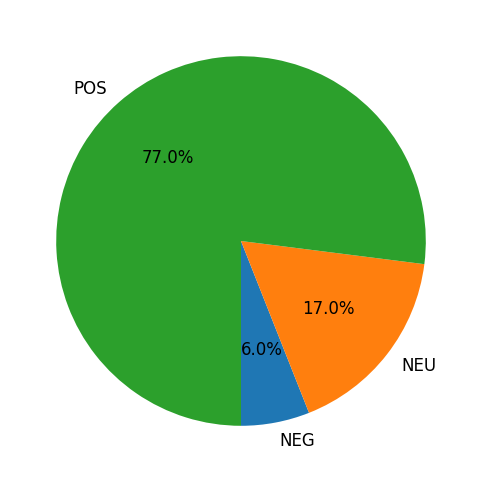

In [3]:
# Let's count the number of comments by sentiments
df = pd.read_csv('/content/sentiments.csv')
sentiment_counts = df.groupby(['sentiment']).size()
print(sentiment_counts)

# Let's visualize the sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

We have more positive reviews than negative and neutral. a word cloud will give us some idea what  the comments are about.

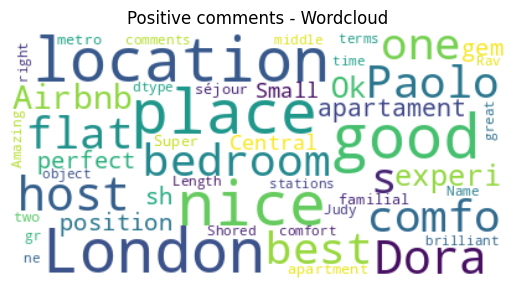

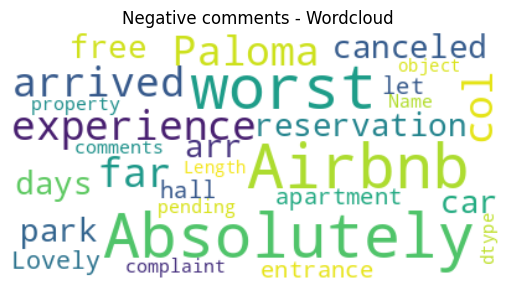

In [4]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Wordcloud with positive comments
positive_tweets = df['comments'][df["sentiment"] == 'POS']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive comments - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

print()

# Wordcloud with negative comments
negative_tweets = df['comments'][df["sentiment"] == 'NEG']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative comments - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

For positive reviews, they are commenting on the location and bedroom, comfort, the host, and others.

while for negative they seem to be complaining about the experience, park, reservation, apartment, and probably canceled booking. but does also appear that the models need a little bit of fine-tuning. I can see lovely highlighted under negative.

ASPECT BASED SENTIMENTS

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# Perform 5-fold cross-validation and get accuracy scores
# The 'accuracy' scoring is used by default for classification problems
scores = cross_val_score(clf, X, y, cv=5)

# Print the accuracy scores for each fold
print("Cross-Validation Scores:", scores)

# Print the mean and standard deviation of the scores
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")


Cross-Validation Scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean Accuracy: 0.9667
Standard Deviation: 0.0211
